### BY : GISELLA NATHANIA

# 1. PRE-PROCESSING

### Import library

In [564]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from sklearn import metrics
import pickle
from scipy.stats import norm
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, average_precision_score, classification_report, f1_score, precision_score 

### Read dataset

In [2]:
dataset = pd.read_csv('/Users/gisellanathania/Documents/dummy_data_oneklik.csv', sep=';')
dataset

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status
0,1,25/06/22 23.59,100000,61057,0
1,2,25/06/22 00.00,63000,61008,0
2,3,25/06/22 00.01,90000,61015,0
3,4,25/06/22 00.01,25000,61057,0
4,5,25/06/22 00.01,100000,61057,0
...,...,...,...,...,...
279422,168266,14/06/22 15.59,50000,61057,0
279423,168267,14/06/22 15.59,26000,61001,0
279424,44617,14/06/22 15.59,60000,61015,0
279425,66633,14/06/22 15.59,56000,61017,0


### Count fraud and non-fraud

In [3]:
print(dataset['fraud_status'].value_counts())

0    279151
1       276
Name: fraud_status, dtype: int64


### Visualize fraud count distribution

<AxesSubplot:title={'center':'Fraud Count Distribution'}>

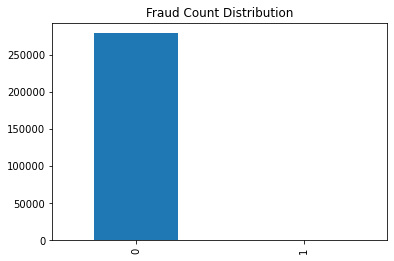

In [4]:
dataset['fraud_status'].value_counts().plot(kind="bar", title="Fraud Count Distribution")

### Check missing values

In [303]:
dataset.isnull().sum()

cust_id_dummy    0
trans_dt         0
tot_amt_idr      0
merchant_id      0
fraud_status     0
dtype: int64

### Check dataset info

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279427 entries, 0 to 279426
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   cust_id_dummy  279427 non-null  int64 
 1   trans_dt       279427 non-null  object
 2   tot_amt_idr    279427 non-null  int64 
 3   merchant_id    279427 non-null  int64 
 4   fraud_status   279427 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 10.7+ MB


### Split dataset by fraud status

In [304]:
dataset_nonfraud = dataset[dataset['fraud_status']==0]
dataset_fraud = dataset[dataset['fraud_status']==1]
dataset_fraud

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status
456,455,2022-06-25 07:58:00,1475000,61057,1
1231,1226,2022-06-25 12:07:00,501000,61021,1
2482,2459,2022-06-25 18:55:00,560000,61057,1
2629,2604,2022-06-25 19:48:00,1000000,61015,1
3270,3232,2022-06-25 00:04:00,1000000,61057,1
...,...,...,...,...,...
272878,165734,2022-06-22 13:13:00,1001000,61021,1
273065,165794,2022-06-22 13:55:00,1001000,61021,1
273233,144800,2022-06-22 14:31:00,1000000,61057,1
277434,103226,2022-06-07 11:17:00,501000,61021,1


In [31]:
drop_nonfraud = dataset_nonfraud.drop(['fraud_status','trans_dt'], axis=1)

### Non fraud skew distribution

/Users/gisellanathania/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gisellanathania/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gisellanathania/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

Non-fraud skew distribution


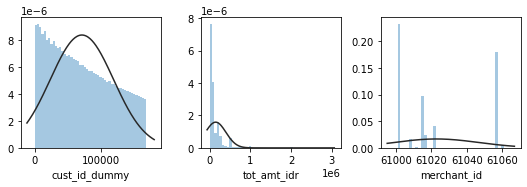

In [456]:
fig, ax = plt.subplots(figsize = (100, 60))
for i, col in enumerate (drop_nonfraud.columns):
    plt.subplot(25, 40, i+1)
    sns.distplot(drop_nonfraud.iloc[:,i],fit=norm, kde=False,ax=plt.gca())
plt.tight_layout()
print("Non-fraud skew distribution")

In [36]:
drop_fraud = dataset_fraud.drop(['fraud_status','trans_dt'], axis=1)

### Fraud skew distribution

/Users/gisellanathania/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gisellanathania/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gisellanathania/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

Fraud skew distribution


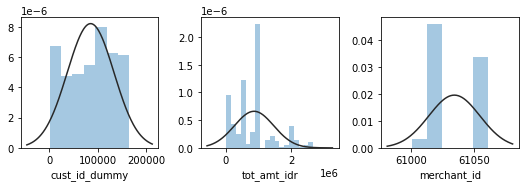

In [457]:
fig, ax = plt.subplots(figsize = (100, 60))
for i, col in enumerate (drop_fraud.columns):
    plt.subplot(25, 40, i+1)
    sns.distplot(drop_fraud.iloc[:,i],fit=norm, kde=False,ax=plt.gca())
plt.tight_layout()
print("Fraud skew distribution")

### Change trans_dt data type

In [38]:
pd.to_datetime(dataset['trans_dt'], errors='ignore')

0         25/06/22 23.59
1         25/06/22 00.00
2         25/06/22 00.01
3         25/06/22 00.01
4         25/06/22 00.01
               ...      
279422    14/06/22 15.59
279423    14/06/22 15.59
279424    14/06/22 15.59
279425    14/06/22 15.59
279426    14/06/22 16.00
Name: trans_dt, Length: 279427, dtype: object

In [49]:
dataset['trans_dt'] = pd.to_datetime(dataset['trans_dt'], format='%d/%m/%y %H.%M')
dataset_sorted = dataset.sort_values(['cust_id_dummy', 'trans_dt'])
dataset_sorted

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status
2886,1,2022-06-25 21:03:00,200000,61057,0
0,1,2022-06-25 23:59:00,100000,61057,0
1,2,2022-06-25 00:00:00,63000,61008,0
186593,3,2022-06-05 18:05:00,124000,61015,0
50144,3,2022-06-06 20:34:00,40000,61015,0
...,...,...,...,...,...
279420,168264,2022-06-14 15:59:00,140000,61008,0
279421,168265,2022-06-14 15:59:00,84000,61001,0
279422,168266,2022-06-14 15:59:00,50000,61057,0
279423,168267,2022-06-14 15:59:00,26000,61001,0


### Extract hour from trans dt

In [50]:
dataset_sorted['hour'] = dataset_sorted['trans_dt'].dt.hour

### Visualize total fraud and non fraud transaction in 24 hour

Usual transaction behaviour during the day/working time and decreases towards midnight
Non usual transaction behaviour during midnight and in afternoon


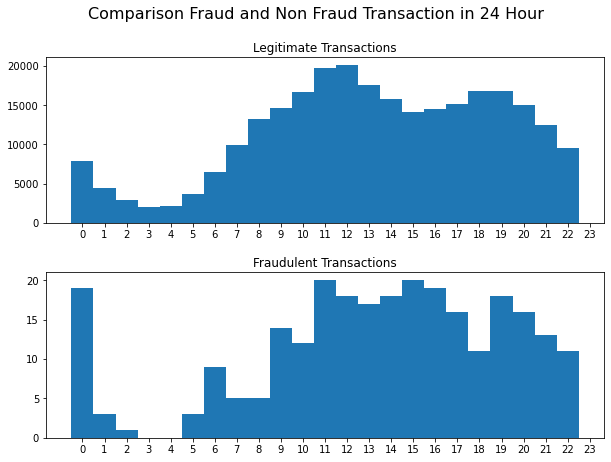

In [63]:
fig, ax = plt.subplots(2, figsize=(10,7))
for i in ax:
    i.set_xticks(range(24))
dataset_sorted.loc[dataset_sorted["fraud_status"] == 0]["hour"].hist(bins=np.arange(24)-0.5, ax=ax[0], grid=False)
print("Usual transaction behaviour during the day/working time and decreases towards midnight")
dataset_sorted.loc[dataset_sorted["fraud_status"] == 1]["hour"].hist(bins=np.arange(24)-0.5, ax=ax[1], grid=False)
print("Non usual transaction behaviour during midnight and in afternoon")
fig.suptitle("Comparison Fraud and Non Fraud Transaction in 24 Hour", fontsize=16)
ax[0].title.set_text("Legitimate Transactions")
ax[1].title.set_text("Fraudulent Transactions")
plt.subplots_adjust(hspace=0.3)

### Set limit

In [591]:
dataset_sorted['limit_per_day']=4000000
dataset_sorted

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day
2886,1,2022-06-25 21:03:00,200000,61057,0,21,4000000
0,1,2022-06-25 23:59:00,100000,61057,0,23,4000000
1,2,2022-06-25 00:00:00,63000,61008,0,0,4000000
186593,3,2022-06-05 18:05:00,124000,61015,0,18,4000000
50144,3,2022-06-06 20:34:00,40000,61015,0,20,4000000
...,...,...,...,...,...,...,...
279420,168264,2022-06-14 15:59:00,140000,61008,0,15,4000000
279421,168265,2022-06-14 15:59:00,84000,61001,0,15,4000000
279422,168266,2022-06-14 15:59:00,50000,61057,0,15,4000000
279423,168267,2022-06-14 15:59:00,26000,61001,0,15,4000000


In [472]:
del dataset_sorted['fraud_count_per_hour']

### Buat 5 error type secara random dengan 'No error' ratio lebih banyak (3:1:1:1:1)

In [592]:
dataset_sorted['error_type'] = pd.Series(random.choices(['No error','Kode OTP salah','Saldo tidak cukup','Transaksi gagal','Melewati limit harian'], weights=[3,1,1,1,1], k=len(dataset_sorted)))
dataset_sorted.sort_values(['cust_id_dummy', 'trans_dt'])

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type
2886,1,2022-06-25 21:03:00,200000,61057,0,21,4000000,No error
0,1,2022-06-25 23:59:00,100000,61057,0,23,4000000,Transaksi gagal
1,2,2022-06-25 00:00:00,63000,61008,0,0,4000000,No error
186593,3,2022-06-05 18:05:00,124000,61015,0,18,4000000,Melewati limit harian
50144,3,2022-06-06 20:34:00,40000,61015,0,20,4000000,Saldo tidak cukup
...,...,...,...,...,...,...,...,...
279420,168264,2022-06-14 15:59:00,140000,61008,0,15,4000000,Melewati limit harian
279421,168265,2022-06-14 15:59:00,84000,61001,0,15,4000000,Saldo tidak cukup
279422,168266,2022-06-14 15:59:00,50000,61057,0,15,4000000,No error
279423,168267,2022-06-14 15:59:00,26000,61001,0,15,4000000,Kode OTP salah


In [67]:
dataset_sorted['error_type'].value_counts()

No error                 119597
Kode OTP salah            40192
Melewati limit harian     40118
Saldo tidak cukup         39763
Transaksi gagal           39757
Name: error_type, dtype: int64

### Label encoder (convert categorical ke numerical)

In [594]:
# labelencoder = LabelEncoder()
dataset_sorted['error_type_cat'] = labelencoder.fit_transform(dataset_sorted['error_type'])
dataset_sorted
#Melewati limit harian = 1
#No error = 2
#Saldo tidak cukup = 3
#Transaksi gagal = 4
#Kode OTP salah = 5

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type,error_type_cat
2886,1,2022-06-25 21:03:00,200000,61057,0,21,4000000,No error,2
0,1,2022-06-25 23:59:00,100000,61057,0,23,4000000,Transaksi gagal,4
1,2,2022-06-25 00:00:00,63000,61008,0,0,4000000,No error,2
186593,3,2022-06-05 18:05:00,124000,61015,0,18,4000000,Melewati limit harian,1
50144,3,2022-06-06 20:34:00,40000,61015,0,20,4000000,Saldo tidak cukup,3
...,...,...,...,...,...,...,...,...,...
279420,168264,2022-06-14 15:59:00,140000,61008,0,15,4000000,Melewati limit harian,1
279421,168265,2022-06-14 15:59:00,84000,61001,0,15,4000000,Saldo tidak cukup,3
279422,168266,2022-06-14 15:59:00,50000,61057,0,15,4000000,No error,2
279423,168267,2022-06-14 15:59:00,26000,61001,0,15,4000000,Kode OTP salah,0


### Make random registration date

In [595]:
#Make a set of distinct cust_id_dummy value (cust_id msh banyak duplicates maka harus dijadikan set dulu)
cust_id_distinct = set(dataset_sorted['cust_id_dummy'])
len(cust_id_distinct)

168268

In [596]:
#buat function untuk random registration date
def str_time_prop(start, end, time_format, prop):
    stime = time.mktime(time.strptime(start, time_format))
    etime = time.mktime(time.strptime(end, time_format))

    ptime = stime + prop * (etime - stime)

    return time.strftime(time_format, time.localtime(ptime))


def random_date(start, end, prop):
    return str_time_prop(start, end, '%Y-%m-%d %I:%M:%S', prop)
    
print(random_date("2022-01-01 1:30:30", "2022-05-31 4:50:35", random.random()))

2022-01-07 08:24:07


In [597]:
#buat list baru (date_reg)
date_reg = []
for i in range(len(cust_id_distinct)):
        date_reg.append(random_date("2022-01-01 1:30:30", "2022-05-31 4:50:35", random.random()))
len(date_reg)

168268

In [598]:
#Convert to a list untuk ada duplicate lagi
cust_id_distinct = list(cust_id_distinct)

In [599]:
#Combine 2 lists into a dataframe
cust_id_reg = pd.DataFrame({'reg_date': date_reg,'cust_id_dummy': cust_id_distinct})
print(cust_id_reg.head())

              reg_date  cust_id_dummy
0  2022-04-14 04:46:14              1
1  2022-04-26 03:03:43              2
2  2022-03-18 07:05:24              3
3  2022-02-01 11:57:10              4
4  2022-04-19 07:03:05              5


### Join dataset

In [600]:
joined_dataset=pd.merge(dataset_sorted, cust_id_reg, on='cust_id_dummy')
joined_dataset

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type,error_type_cat,reg_date
0,1,2022-06-25 21:03:00,200000,61057,0,21,4000000,No error,2,2022-04-14 04:46:14
1,1,2022-06-25 23:59:00,100000,61057,0,23,4000000,Transaksi gagal,4,2022-04-14 04:46:14
2,2,2022-06-25 00:00:00,63000,61008,0,0,4000000,No error,2,2022-04-26 03:03:43
3,3,2022-06-05 18:05:00,124000,61015,0,18,4000000,Melewati limit harian,1,2022-03-18 07:05:24
4,3,2022-06-06 20:34:00,40000,61015,0,20,4000000,Saldo tidak cukup,3,2022-03-18 07:05:24
...,...,...,...,...,...,...,...,...,...,...
279422,168264,2022-06-14 15:59:00,140000,61008,0,15,4000000,Melewati limit harian,1,2022-02-10 07:35:31
279423,168265,2022-06-14 15:59:00,84000,61001,0,15,4000000,Saldo tidak cukup,3,2022-05-02 05:00:43
279424,168266,2022-06-14 15:59:00,50000,61057,0,15,4000000,No error,2,2022-05-19 02:50:12
279425,168267,2022-06-14 15:59:00,26000,61001,0,15,4000000,Kode OTP salah,0,2022-04-20 02:04:51


### Change reg_date data type

In [603]:
pd.to_datetime(joined_dataset['reg_date'], errors='ignore')

0        2022-04-14 04:46:14
1        2022-04-14 04:46:14
2        2022-04-26 03:03:43
3        2022-03-18 07:05:24
4        2022-03-18 07:05:24
                 ...        
279422   2022-02-10 07:35:31
279423   2022-05-02 05:00:43
279424   2022-05-19 02:50:12
279425   2022-04-20 02:04:51
279426   2022-05-06 08:13:12
Name: reg_date, Length: 279427, dtype: datetime64[ns]

In [604]:
joined_dataset['reg_date'] = pd.to_datetime(joined_dataset['reg_date'], format='%Y/%m/%d %H:%M:%S.%f')

### Buat column baru (gap registration date ke 1st transaction per cust id)

In [605]:
#Menampilkan transaksi pertama per cust id
dataset_min=joined_dataset.groupby('cust_id_dummy').min().reset_index()

In [606]:
#Hitung gap hari nya
dataset_min['gap_reg_1st_trans']=(dataset_min['trans_dt'] - dataset_min['reg_date']).dt.days
dataset_min

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type,error_type_cat,reg_date,gap_reg_1st_trans
0,1,2022-06-25 21:03:00,100000,61057,0,21,4000000,No error,2,2022-04-14 04:46:14,72
1,2,2022-06-25 00:00:00,63000,61008,0,0,4000000,No error,2,2022-04-26 03:03:43,59
2,3,2022-06-05 18:05:00,15000,61011,0,0,4000000,Kode OTP salah,0,2022-03-18 07:05:24,79
3,4,2022-06-04 14:48:00,20000,61057,0,0,4000000,Kode OTP salah,0,2022-02-01 11:57:10,123
4,5,2022-06-04 00:06:00,100000,61021,0,0,4000000,No error,2,2022-04-19 07:03:05,45
...,...,...,...,...,...,...,...,...,...,...,...
168263,168264,2022-06-14 15:59:00,140000,61008,0,15,4000000,Melewati limit harian,1,2022-02-10 07:35:31,124
168264,168265,2022-06-14 15:59:00,84000,61001,0,15,4000000,Saldo tidak cukup,3,2022-05-02 05:00:43,43
168265,168266,2022-06-14 15:59:00,50000,61057,0,15,4000000,No error,2,2022-05-19 02:50:12,26
168266,168267,2022-06-14 15:59:00,26000,61001,0,15,4000000,Kode OTP salah,0,2022-04-20 02:04:51,55


### Visualize gap hari registration date ke transaksi pertama

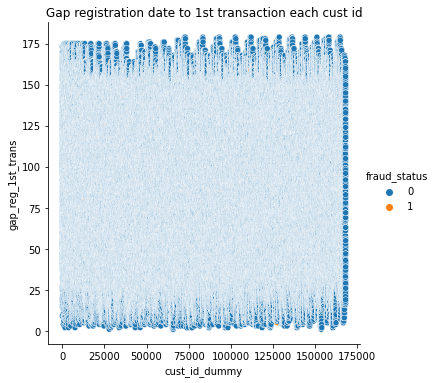

In [682]:
sns.relplot(data=dataset_min, x="cust_id_dummy", y="gap_reg_1st_trans",kind="scatter", hue="fraud_status").set(title="Gap registration date to 1st transaction each cust id")

### Join dataframe

In [608]:
joined_data=pd.merge(joined_dataset, dataset_min[['cust_id_dummy', 'gap_reg_1st_trans']], on=['cust_id_dummy'])
joined_data

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type,error_type_cat,reg_date,gap_reg_1st_trans
0,1,2022-06-25 21:03:00,200000,61057,0,21,4000000,No error,2,2022-04-14 04:46:14,72
1,1,2022-06-25 23:59:00,100000,61057,0,23,4000000,Transaksi gagal,4,2022-04-14 04:46:14,72
2,2,2022-06-25 00:00:00,63000,61008,0,0,4000000,No error,2,2022-04-26 03:03:43,59
3,3,2022-06-05 18:05:00,124000,61015,0,18,4000000,Melewati limit harian,1,2022-03-18 07:05:24,79
4,3,2022-06-06 20:34:00,40000,61015,0,20,4000000,Saldo tidak cukup,3,2022-03-18 07:05:24,79
...,...,...,...,...,...,...,...,...,...,...,...
279422,168264,2022-06-14 15:59:00,140000,61008,0,15,4000000,Melewati limit harian,1,2022-02-10 07:35:31,124
279423,168265,2022-06-14 15:59:00,84000,61001,0,15,4000000,Saldo tidak cukup,3,2022-05-02 05:00:43,43
279424,168266,2022-06-14 15:59:00,50000,61057,0,15,4000000,No error,2,2022-05-19 02:50:12,26
279425,168267,2022-06-14 15:59:00,26000,61001,0,15,4000000,Kode OTP salah,0,2022-04-20 02:04:51,55


### Buat key_5days, key_10days, key_15days untuk grouping trans_dt 

In [609]:
for i in range(len(joined_data.trans_dt)):
    if pd.Timestamp("2022-06-01 00:00:00") <= joined_data.loc[i, "trans_dt"] <= pd.Timestamp("2022-06-05 23:59:59"):
        joined_data.loc[i, "key_5days"] = 5
        joined_data.loc[i, "key_10days"] = 10
        joined_data.loc[i, "key_15days"] = 15        
    elif pd.Timestamp("2022-06-06 00:00:00") <= joined_data.loc[i, "trans_dt"] <= pd.Timestamp("2022-06-10 23:59:59"):
        joined_data.loc[i, "key_5days"] = 10
        joined_data.loc[i, "key_10days"] = 10
        joined_data.loc[i, "key_15days"] = 15
    elif pd.Timestamp("2022-06-10 00:00:00") <= joined_data.loc[i, "trans_dt"] <= pd.Timestamp("2022-06-15 23:59:59"):
        joined_data.loc[i, "key_5days"] = 15
        joined_data.loc[i, "key_10days"] = 20
        joined_data.loc[i, "key_15days"] = 15
    elif pd.Timestamp("2022-06-16 00:00:00") <= joined_data.loc[i, "trans_dt"] <= pd.Timestamp("2022-06-20 23:59:59"):
        joined_data.loc[i, "key_5days"] = 20
        joined_data.loc[i, "key_10days"] = 20
        joined_data.loc[i, "key_15days"] = 30
    elif pd.Timestamp("2022-06-21 00:00:00") <= joined_data.loc[i, "trans_dt"] <= pd.Timestamp("2022-06-25 23:59:59"):
        joined_data.loc[i, "key_5days"] = 25
        joined_data.loc[i, "key_10days"] = 30
        joined_data.loc[i, "key_15days"] = 30
    elif pd.Timestamp("2022-06-26 00:00:00") <= joined_data.loc[i, "trans_dt"] <= pd.Timestamp("2022-06-30 23:59:59"):
        joined_data.loc[i, "key_5days"] = 30
        joined_data.loc[i, "key_10days"] = 30
        joined_data.loc[i, "key_15days"] = 30

### Buat key_week untuk grouping trans_dt per 1 week

In [612]:
for i in range(len(joined_data.trans_dt)):
    if pd.Timestamp("2022-06-01 00:00:00") <= joined_data.loc[i, "trans_dt"] <= pd.Timestamp("2022-06-07 23:59:59"):
        joined_data.loc[i, "key_week"] = 1     
    elif pd.Timestamp("2022-06-08 00:00:00") <= joined_data.loc[i, "trans_dt"] <= pd.Timestamp("2022-06-14 23:59:59"):
        joined_data.loc[i, "key_week"] = 2
    elif pd.Timestamp("2022-06-15 00:00:00") <= joined_data.loc[i, "trans_dt"] <= pd.Timestamp("2022-06-21 23:59:59"):
        joined_data.loc[i, "key_week"] = 3
    elif pd.Timestamp("2022-06-22 00:00:00") <= joined_data.loc[i, "trans_dt"] <= pd.Timestamp("2022-06-30 23:59:59"):
        joined_data.loc[i, "key_week"] = 4

### Extract day dari trans_dt

In [613]:
joined_data['trans_day'] = joined_data['trans_dt'].dt.day

In [216]:
joined_data

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,fraud_count_per_hour,limit_per_day,error_type,error_type_cat,reg_date,gap_reg_1st_trans,key_5days,key_10days,key_15days,trans_day,key_week
0,1,2022-06-25 21:03:00,200000,61057,0,21,0,4000000,Transaksi gagal,4,2022-04-08 10:08:05,78,25.0,30.0,30.0,25,4.0
1,1,2022-06-25 23:59:00,100000,61057,0,23,0,4000000,Transaksi gagal,4,2022-04-08 10:08:05,78,25.0,30.0,30.0,25,4.0
2,2,2022-06-25 00:00:00,63000,61008,0,0,0,4000000,No error,2,2022-01-08 06:26:43,167,25.0,30.0,30.0,25,4.0
3,3,2022-06-05 18:05:00,124000,61015,0,18,0,4000000,No error,2,2022-02-26 08:59:26,99,5.0,10.0,15.0,5,1.0
4,3,2022-06-06 20:34:00,40000,61015,0,20,0,4000000,Melewati limit harian,1,2022-02-26 08:59:26,99,10.0,10.0,15.0,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279422,168264,2022-06-14 15:59:00,140000,61008,0,15,0,4000000,Saldo tidak cukup,3,2022-01-20 03:24:48,145,15.0,20.0,15.0,14,2.0
279423,168265,2022-06-14 15:59:00,84000,61001,0,15,0,4000000,Kode OTP salah,0,2022-04-19 06:12:46,56,15.0,20.0,15.0,14,2.0
279424,168266,2022-06-14 15:59:00,50000,61057,0,15,0,4000000,No error,2,2022-01-11 07:03:21,154,15.0,20.0,15.0,14,2.0
279425,168267,2022-06-14 15:59:00,26000,61001,0,15,0,4000000,No error,2,2022-01-12 11:30:45,153,15.0,20.0,15.0,14,2.0


### Count total error during last 5 days of transaction

### Exclude error type cat = 2 (No error) agar tidak ikut terhitung 

In [614]:
data_select = joined_data[['cust_id_dummy', 'key_5days', 'error_type_cat']]
data_select = data_select[data_select['error_type_cat']!=2]
data_select

,cust_id_dummy,key_5days,error_type_cat
1,1,25.0,4
3,3,5.0,1
4,3,10.0,3
5,3,10.0,1
6,3,10.0,4
...,...,...,...
279421,168263,15.0,4
279422,168264,15.0,1
279423,168265,15.0,3
279425,168267,15.0,0


### Hitung total error 5 hari terakhir dengan group by dan count cust id dan key_5days

In [615]:
data_select = data_select.groupby(['cust_id_dummy', 'key_5days']).count().reset_index()
data_select.rename(columns={'error_type_cat':'total_error_5days'}, inplace=True)
data_select

,cust_id_dummy,key_5days,total_error_5days
0,1,25.0,1
1,3,5.0,1
2,3,10.0,5
3,3,15.0,2
4,3,20.0,1
...,...,...,...
145334,168263,15.0,1
145335,168264,15.0,1
145336,168265,15.0,1
145337,168267,15.0,1


### Join dataframe

In [616]:
data_total_error = pd.merge(joined_data, data_select, on=['cust_id_dummy', 'key_5days'])
data_total_error

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type,error_type_cat,reg_date,gap_reg_1st_trans,key_5days,key_10days,key_15days,key_week,trans_day,total_error_5days
0,1,2022-06-25 21:03:00,200000,61057,0,21,4000000,No error,2,2022-04-14 04:46:14,72,25.0,30.0,30.0,4.0,25,1
1,1,2022-06-25 23:59:00,100000,61057,0,23,4000000,Transaksi gagal,4,2022-04-14 04:46:14,72,25.0,30.0,30.0,4.0,25,1
2,3,2022-06-05 18:05:00,124000,61015,0,18,4000000,Melewati limit harian,1,2022-03-18 07:05:24,79,5.0,10.0,15.0,1.0,5,1
3,3,2022-06-06 20:34:00,40000,61015,0,20,4000000,Saldo tidak cukup,3,2022-03-18 07:05:24,79,10.0,10.0,15.0,1.0,6,5
4,3,2022-06-07 21:31:00,130000,61015,0,21,4000000,Melewati limit harian,1,2022-03-18 07:05:24,79,10.0,10.0,15.0,1.0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179120,168263,2022-06-14 15:58:00,15000,61001,0,15,4000000,Transaksi gagal,4,2022-04-03 08:36:27,72,15.0,20.0,15.0,2.0,14,1
179121,168264,2022-06-14 15:59:00,140000,61008,0,15,4000000,Melewati limit harian,1,2022-02-10 07:35:31,124,15.0,20.0,15.0,2.0,14,1
179122,168265,2022-06-14 15:59:00,84000,61001,0,15,4000000,Saldo tidak cukup,3,2022-05-02 05:00:43,43,15.0,20.0,15.0,2.0,14,1
179123,168267,2022-06-14 15:59:00,26000,61001,0,15,4000000,Kode OTP salah,0,2022-04-20 02:04:51,55,15.0,20.0,15.0,2.0,14,1


### Left join dataframe karena data_total_error tidak menampilkan single cust_id yang No error (agar dapat terisi dengan NaN)

In [617]:
join_data_error = joined_data.merge(data_total_error, how='left')
join_data_error

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type,error_type_cat,reg_date,gap_reg_1st_trans,key_5days,key_10days,key_15days,key_week,trans_day,total_error_5days
0,1,2022-06-25 21:03:00,200000,61057,0,21,4000000,No error,2,2022-04-14 04:46:14,72,25.0,30.0,30.0,4.0,25,1.0
1,1,2022-06-25 23:59:00,100000,61057,0,23,4000000,Transaksi gagal,4,2022-04-14 04:46:14,72,25.0,30.0,30.0,4.0,25,1.0
2,2,2022-06-25 00:00:00,63000,61008,0,0,4000000,No error,2,2022-04-26 03:03:43,59,25.0,30.0,30.0,4.0,25,NaN
3,3,2022-06-05 18:05:00,124000,61015,0,18,4000000,Melewati limit harian,1,2022-03-18 07:05:24,79,5.0,10.0,15.0,1.0,5,1.0
4,3,2022-06-06 20:34:00,40000,61015,0,20,4000000,Saldo tidak cukup,3,2022-03-18 07:05:24,79,10.0,10.0,15.0,1.0,6,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279670,168264,2022-06-14 15:59:00,140000,61008,0,15,4000000,Melewati limit harian,1,2022-02-10 07:35:31,124,15.0,20.0,15.0,2.0,14,1.0
279671,168265,2022-06-14 15:59:00,84000,61001,0,15,4000000,Saldo tidak cukup,3,2022-05-02 05:00:43,43,15.0,20.0,15.0,2.0,14,1.0
279672,168266,2022-06-14 15:59:00,50000,61057,0,15,4000000,No error,2,2022-05-19 02:50:12,26,15.0,20.0,15.0,2.0,14,NaN
279673,168267,2022-06-14 15:59:00,26000,61001,0,15,4000000,Kode OTP salah,0,2022-04-20 02:04:51,55,15.0,20.0,15.0,2.0,14,1.0


### Replace NaN dengan 0 karena No error

In [618]:
join_data_error['total_error_5days'] = join_data_error['total_error_5days'].fillna(0)

In [222]:
join_data_error[join_data_error['cust_id_dummy']==3]

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,fraud_count_per_hour,limit_per_day,error_type,error_type_cat,reg_date,gap_reg_1st_trans,key_5days,key_10days,key_15days,trans_day,key_week,total_error_5days
3,3,2022-06-05 18:05:00,124000,61015,0,18,0,4000000,No error,2,2022-02-26 08:59:26,99,5.0,10.0,15.0,5,1.0,0.0
4,3,2022-06-06 20:34:00,40000,61015,0,20,0,4000000,Melewati limit harian,1,2022-02-26 08:59:26,99,10.0,10.0,15.0,6,1.0,2.0
5,3,2022-06-07 21:31:00,130000,61015,0,21,0,4000000,No error,2,2022-02-26 08:59:26,99,10.0,10.0,15.0,7,1.0,2.0
6,3,2022-06-09 02:11:00,200000,61015,0,2,0,4000000,No error,2,2022-02-26 08:59:26,99,10.0,10.0,15.0,9,2.0,2.0
7,3,2022-06-09 02:31:00,58800,61015,0,2,0,4000000,No error,2,2022-02-26 08:59:26,99,10.0,10.0,15.0,9,2.0,2.0
8,3,2022-06-09 02:54:00,130000,61015,0,2,0,4000000,Transaksi gagal,4,2022-02-26 08:59:26,99,10.0,10.0,15.0,9,2.0,2.0
9,3,2022-06-11 16:59:00,100000,61015,0,16,0,4000000,No error,2,2022-02-26 08:59:26,99,15.0,20.0,15.0,11,2.0,2.0
10,3,2022-06-14 15:41:00,135000,61015,0,15,0,4000000,Saldo tidak cukup,3,2022-02-26 08:59:26,99,15.0,20.0,15.0,14,2.0,2.0
11,3,2022-06-14 23:42:00,28000,61015,0,23,0,4000000,Transaksi gagal,4,2022-02-26 08:59:26,99,15.0,20.0,15.0,14,2.0,2.0
12,3,2022-06-17 00:42:00,30000,61015,0,0,0,4000000,No error,2,2022-02-26 08:59:26,99,20.0,20.0,30.0,17,3.0,1.0


### Menghitung total transaksi per 5 hari

In [619]:
join_data_error['last_5days_trans']=join_data_error.groupby(['cust_id_dummy','key_5days'])['tot_amt_idr'].transform('sum')
join_data_error[join_data_error['cust_id_dummy']==186]

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type,error_type_cat,reg_date,gap_reg_1st_trans,key_5days,key_10days,key_15days,key_week,trans_day,total_error_5days,last_5days_trans
495,186,2022-06-14 13:33:00,20000,61001,0,13,4000000,Transaksi gagal,4,2022-02-19 09:06:38,115,15.0,20.0,15.0,2.0,14,3.0,240000
496,186,2022-06-14 16:41:00,20000,61001,0,16,4000000,Kode OTP salah,0,2022-02-19 09:06:38,115,15.0,20.0,15.0,2.0,14,3.0,240000
497,186,2022-06-14 23:39:00,100000,61001,0,23,4000000,No error,2,2022-02-19 09:06:38,115,15.0,20.0,15.0,2.0,14,3.0,240000
498,186,2022-06-14 23:39:00,100000,61001,0,23,4000000,Melewati limit harian,1,2022-02-19 09:06:38,115,15.0,20.0,15.0,2.0,14,3.0,240000
499,186,2022-06-22 20:53:00,20000,61001,0,20,4000000,Kode OTP salah,0,2022-02-19 09:06:38,115,25.0,30.0,30.0,4.0,22,3.0,404240
500,186,2022-06-25 02:14:00,284240,61011,0,2,4000000,Saldo tidak cukup,3,2022-02-19 09:06:38,115,25.0,30.0,30.0,4.0,25,3.0,404240
501,186,2022-06-25 21:29:00,100000,61001,0,21,4000000,Melewati limit harian,1,2022-02-19 09:06:38,115,25.0,30.0,30.0,4.0,25,3.0,404240
502,186,2022-06-26 22:46:00,10000,61015,0,22,4000000,Transaksi gagal,4,2022-02-19 09:06:38,115,30.0,30.0,30.0,4.0,26,1.0,10000


### Menghitung total transaksi per 10 hari

In [620]:
join_data_error['last_10days_trans']=join_data_error.groupby(['cust_id_dummy','key_10days'])['tot_amt_idr'].transform('sum')
join_data_error

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type,error_type_cat,reg_date,gap_reg_1st_trans,key_5days,key_10days,key_15days,key_week,trans_day,total_error_5days,last_5days_trans,last_10days_trans
0,1,2022-06-25 21:03:00,200000,61057,0,21,4000000,No error,2,2022-04-14 04:46:14,72,25.0,30.0,30.0,4.0,25,1.0,300000,300000
1,1,2022-06-25 23:59:00,100000,61057,0,23,4000000,Transaksi gagal,4,2022-04-14 04:46:14,72,25.0,30.0,30.0,4.0,25,1.0,300000,300000
2,2,2022-06-25 00:00:00,63000,61008,0,0,4000000,No error,2,2022-04-26 03:03:43,59,25.0,30.0,30.0,4.0,25,0.0,63000,63000
3,3,2022-06-05 18:05:00,124000,61015,0,18,4000000,Melewati limit harian,1,2022-03-18 07:05:24,79,5.0,10.0,15.0,1.0,5,1.0,124000,682800
4,3,2022-06-06 20:34:00,40000,61015,0,20,4000000,Saldo tidak cukup,3,2022-03-18 07:05:24,79,10.0,10.0,15.0,1.0,6,5.0,558800,682800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279670,168264,2022-06-14 15:59:00,140000,61008,0,15,4000000,Melewati limit harian,1,2022-02-10 07:35:31,124,15.0,20.0,15.0,2.0,14,1.0,140000,140000
279671,168265,2022-06-14 15:59:00,84000,61001,0,15,4000000,Saldo tidak cukup,3,2022-05-02 05:00:43,43,15.0,20.0,15.0,2.0,14,1.0,84000,84000
279672,168266,2022-06-14 15:59:00,50000,61057,0,15,4000000,No error,2,2022-05-19 02:50:12,26,15.0,20.0,15.0,2.0,14,0.0,50000,50000
279673,168267,2022-06-14 15:59:00,26000,61001,0,15,4000000,Kode OTP salah,0,2022-04-20 02:04:51,55,15.0,20.0,15.0,2.0,14,1.0,26000,26000


### Menghitung total transaksi per 15 hari

In [621]:
join_data_error['last_15days_trans']=join_data_error.groupby(['cust_id_dummy','key_15days'])['tot_amt_idr'].transform('sum')
join_data_error

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type,error_type_cat,reg_date,gap_reg_1st_trans,key_5days,key_10days,key_15days,key_week,trans_day,total_error_5days,last_5days_trans,last_10days_trans,last_15days_trans
0,1,2022-06-25 21:03:00,200000,61057,0,21,4000000,No error,2,2022-04-14 04:46:14,72,25.0,30.0,30.0,4.0,25,1.0,300000,300000,300000
1,1,2022-06-25 23:59:00,100000,61057,0,23,4000000,Transaksi gagal,4,2022-04-14 04:46:14,72,25.0,30.0,30.0,4.0,25,1.0,300000,300000,300000
2,2,2022-06-25 00:00:00,63000,61008,0,0,4000000,No error,2,2022-04-26 03:03:43,59,25.0,30.0,30.0,4.0,25,0.0,63000,63000,63000
3,3,2022-06-05 18:05:00,124000,61015,0,18,4000000,Melewati limit harian,1,2022-03-18 07:05:24,79,5.0,10.0,15.0,1.0,5,1.0,124000,682800,945800
4,3,2022-06-06 20:34:00,40000,61015,0,20,4000000,Saldo tidak cukup,3,2022-03-18 07:05:24,79,10.0,10.0,15.0,1.0,6,5.0,558800,682800,945800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279670,168264,2022-06-14 15:59:00,140000,61008,0,15,4000000,Melewati limit harian,1,2022-02-10 07:35:31,124,15.0,20.0,15.0,2.0,14,1.0,140000,140000,140000
279671,168265,2022-06-14 15:59:00,84000,61001,0,15,4000000,Saldo tidak cukup,3,2022-05-02 05:00:43,43,15.0,20.0,15.0,2.0,14,1.0,84000,84000,84000
279672,168266,2022-06-14 15:59:00,50000,61057,0,15,4000000,No error,2,2022-05-19 02:50:12,26,15.0,20.0,15.0,2.0,14,0.0,50000,50000,50000
279673,168267,2022-06-14 15:59:00,26000,61001,0,15,4000000,Kode OTP salah,0,2022-04-20 02:04:51,55,15.0,20.0,15.0,2.0,14,1.0,26000,26000,26000


### Menghitung total transaksi per hari nya

In [622]:
join_data_error['total_trans_each_day']=join_data_error.groupby(['cust_id_dummy','trans_day'])['tot_amt_idr'].transform('sum')
join_data_error

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type,error_type_cat,reg_date,...,key_5days,key_10days,key_15days,key_week,trans_day,total_error_5days,last_5days_trans,last_10days_trans,last_15days_trans,total_trans_each_day
0,1,2022-06-25 21:03:00,200000,61057,0,21,4000000,No error,2,2022-04-14 04:46:14,...,25.0,30.0,30.0,4.0,25,1.0,300000,300000,300000,300000
1,1,2022-06-25 23:59:00,100000,61057,0,23,4000000,Transaksi gagal,4,2022-04-14 04:46:14,...,25.0,30.0,30.0,4.0,25,1.0,300000,300000,300000,300000
2,2,2022-06-25 00:00:00,63000,61008,0,0,4000000,No error,2,2022-04-26 03:03:43,...,25.0,30.0,30.0,4.0,25,0.0,63000,63000,63000,63000
3,3,2022-06-05 18:05:00,124000,61015,0,18,4000000,Melewati limit harian,1,2022-03-18 07:05:24,...,5.0,10.0,15.0,1.0,5,1.0,124000,682800,945800,124000
4,3,2022-06-06 20:34:00,40000,61015,0,20,4000000,Saldo tidak cukup,3,2022-03-18 07:05:24,...,10.0,10.0,15.0,1.0,6,5.0,558800,682800,945800,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279670,168264,2022-06-14 15:59:00,140000,61008,0,15,4000000,Melewati limit harian,1,2022-02-10 07:35:31,...,15.0,20.0,15.0,2.0,14,1.0,140000,140000,140000,140000
279671,168265,2022-06-14 15:59:00,84000,61001,0,15,4000000,Saldo tidak cukup,3,2022-05-02 05:00:43,...,15.0,20.0,15.0,2.0,14,1.0,84000,84000,84000,84000
279672,168266,2022-06-14 15:59:00,50000,61057,0,15,4000000,No error,2,2022-05-19 02:50:12,...,15.0,20.0,15.0,2.0,14,0.0,50000,50000,50000,50000
279673,168267,2022-06-14 15:59:00,26000,61001,0,15,4000000,Kode OTP salah,0,2022-04-20 02:04:51,...,15.0,20.0,15.0,2.0,14,1.0,26000,26000,26000,26000


### Menghitung persentase sisa limit harian

In [623]:
#limit-total trans each day
join_data_error['sisa_limit']=(join_data_error['limit_per_day'] - join_data_error['total_trans_each_day'])/join_data_error['limit_per_day']*100
join_data_error

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type,error_type_cat,reg_date,...,key_10days,key_15days,key_week,trans_day,total_error_5days,last_5days_trans,last_10days_trans,last_15days_trans,total_trans_each_day,sisa_limit
0,1,2022-06-25 21:03:00,200000,61057,0,21,4000000,No error,2,2022-04-14 04:46:14,...,30.0,30.0,4.0,25,1.0,300000,300000,300000,300000,92.500
1,1,2022-06-25 23:59:00,100000,61057,0,23,4000000,Transaksi gagal,4,2022-04-14 04:46:14,...,30.0,30.0,4.0,25,1.0,300000,300000,300000,300000,92.500
2,2,2022-06-25 00:00:00,63000,61008,0,0,4000000,No error,2,2022-04-26 03:03:43,...,30.0,30.0,4.0,25,0.0,63000,63000,63000,63000,98.425
3,3,2022-06-05 18:05:00,124000,61015,0,18,4000000,Melewati limit harian,1,2022-03-18 07:05:24,...,10.0,15.0,1.0,5,1.0,124000,682800,945800,124000,96.900
4,3,2022-06-06 20:34:00,40000,61015,0,20,4000000,Saldo tidak cukup,3,2022-03-18 07:05:24,...,10.0,15.0,1.0,6,5.0,558800,682800,945800,40000,99.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279670,168264,2022-06-14 15:59:00,140000,61008,0,15,4000000,Melewati limit harian,1,2022-02-10 07:35:31,...,20.0,15.0,2.0,14,1.0,140000,140000,140000,140000,96.500
279671,168265,2022-06-14 15:59:00,84000,61001,0,15,4000000,Saldo tidak cukup,3,2022-05-02 05:00:43,...,20.0,15.0,2.0,14,1.0,84000,84000,84000,84000,97.900
279672,168266,2022-06-14 15:59:00,50000,61057,0,15,4000000,No error,2,2022-05-19 02:50:12,...,20.0,15.0,2.0,14,0.0,50000,50000,50000,50000,98.750
279673,168267,2022-06-14 15:59:00,26000,61001,0,15,4000000,Kode OTP salah,0,2022-04-20 02:04:51,...,20.0,15.0,2.0,14,1.0,26000,26000,26000,26000,99.350


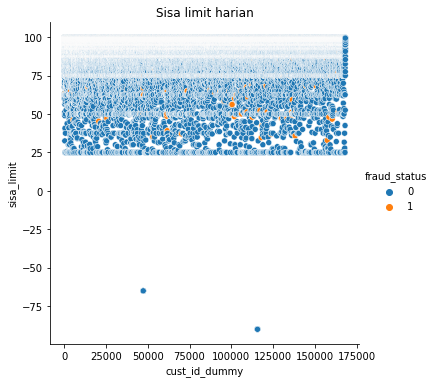

In [684]:
#data viz
sns.relplot(data=join_data_error, x="cust_id_dummy", y="sisa_limit",kind="scatter", hue="fraud_status").set(title="Sisa limit harian")

### Extract bulan, tahun, dan hari dari trans_dt dan reg_date

In [624]:
join_data_error['trans_month'] = join_data_error['trans_dt'].dt.month
join_data_error['trans_year'] = join_data_error['trans_dt'].dt.year
join_data_error['reg_day'] = join_data_error['reg_date'].dt.day
join_data_error['reg_month'] = join_data_error['reg_date'].dt.month
join_data_error['reg_year'] = join_data_error['reg_date'].dt.year
join_data_error

,cust_id_dummy,trans_dt,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type,error_type_cat,reg_date,...,last_5days_trans,last_10days_trans,last_15days_trans,total_trans_each_day,sisa_limit,trans_month,trans_year,reg_day,reg_month,reg_year
0,1,2022-06-25 21:03:00,200000,61057,0,21,4000000,No error,2,2022-04-14 04:46:14,...,300000,300000,300000,300000,92.500,6,2022,14,4,2022
1,1,2022-06-25 23:59:00,100000,61057,0,23,4000000,Transaksi gagal,4,2022-04-14 04:46:14,...,300000,300000,300000,300000,92.500,6,2022,14,4,2022
2,2,2022-06-25 00:00:00,63000,61008,0,0,4000000,No error,2,2022-04-26 03:03:43,...,63000,63000,63000,63000,98.425,6,2022,26,4,2022
3,3,2022-06-05 18:05:00,124000,61015,0,18,4000000,Melewati limit harian,1,2022-03-18 07:05:24,...,124000,682800,945800,124000,96.900,6,2022,18,3,2022
4,3,2022-06-06 20:34:00,40000,61015,0,20,4000000,Saldo tidak cukup,3,2022-03-18 07:05:24,...,558800,682800,945800,40000,99.000,6,2022,18,3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279670,168264,2022-06-14 15:59:00,140000,61008,0,15,4000000,Melewati limit harian,1,2022-02-10 07:35:31,...,140000,140000,140000,140000,96.500,6,2022,10,2,2022
279671,168265,2022-06-14 15:59:00,84000,61001,0,15,4000000,Saldo tidak cukup,3,2022-05-02 05:00:43,...,84000,84000,84000,84000,97.900,6,2022,2,5,2022
279672,168266,2022-06-14 15:59:00,50000,61057,0,15,4000000,No error,2,2022-05-19 02:50:12,...,50000,50000,50000,50000,98.750,6,2022,19,5,2022
279673,168267,2022-06-14 15:59:00,26000,61001,0,15,4000000,Kode OTP salah,0,2022-04-20 02:04:51,...,26000,26000,26000,26000,99.350,6,2022,20,4,2022


In [625]:
join_data_error.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279675 entries, 0 to 279674
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   cust_id_dummy         279675 non-null  int64         
 1   trans_dt              279675 non-null  datetime64[ns]
 2   tot_amt_idr           279675 non-null  int64         
 3   merchant_id           279675 non-null  int64         
 4   fraud_status          279675 non-null  int64         
 5   hour                  279675 non-null  int64         
 6   limit_per_day         279675 non-null  int64         
 7   error_type            279675 non-null  object        
 8   error_type_cat        279675 non-null  int64         
 9   reg_date              279675 non-null  datetime64[ns]
 10  gap_reg_1st_trans     279675 non-null  int64         
 11  key_5days             279675 non-null  float64       
 12  key_10days            279675 non-null  float64       
 13 

# 2. MODEL SELECTION

### Drop 3 features yang tidak bisa diproses di modeling

In [626]:
final_data = join_data_error.drop(['trans_dt', 'reg_date','error_type'], axis=1)
final_data.columns

Index(['cust_id_dummy', 'tot_amt_idr', 'merchant_id', 'fraud_status', 'hour',
       'limit_per_day', 'error_type_cat', 'gap_reg_1st_trans', 'key_5days',
       'key_10days', 'key_15days', 'key_week', 'trans_day',
       'total_error_5days', 'last_5days_trans', 'last_10days_trans',
       'last_15days_trans', 'total_trans_each_day', 'sisa_limit',
       'trans_month', 'trans_year', 'reg_day', 'reg_month', 'reg_year'],
      dtype='object')

### Select X data

In [627]:
X = final_data.drop('fraud_status', axis=1)

### Select y data

In [628]:
y = final_data['fraud_status']

### Select X_train dan y_train

In [629]:
X_train = final_data.loc[:, ~final_data.columns.isin(['fraud_status'])]
y_train = final_data['fraud_status']

### Select X_test dan y_test

In [630]:
X_test = final_data.loc[:, ~final_data.columns.isin(['fraud_status'])]
y_test = final_data['fraud_status']

### Logistic Regression

In [631]:
kf=StratifiedKFold(n_splits=10)
for index_train, index_test in kf.split(X,y):
    under_sampler = RandomUnderSampler(random_state=42, sampling_strategy='majority')
    X_train_resampled, y_train_resampled = under_sampler.fit_resample(X[X.index.isin(index_train)], y[y.index.isin(index_train)])
    X_test_resampled, y_test_resampled = X[X.index.isin(index_test)], y[y.index.isin(index_test)]
    log_model = LogisticRegression(random_state=42).fit(X_train_resampled, y_train_resampled)
    y_pred_log = log_model.predict(X_test_resampled)
    print("Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(y_test_resampled, y_pred_log), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))
    log_acc = cross_val_score(log_model, X_train_resampled, y_train_resampled, cv=kf, n_jobs=1)
    log_recall = cross_val_score(log_model, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
    log_precision = cross_val_score(log_model, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
    log_f1 = cross_val_score(log_model, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')

Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               26291                1649
Actual Negative                   9                  19
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               26187                1753
Actual Negative                   9                  19
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               25846                2094
Actual Negative                   5                  23
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               25733                2207
Actual Negative                   5                  23
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               25704                2236
Actual Negative                   4                  24
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Ac

### Accuracy, precision, recall, F1 score per fold (10 folds)

In [632]:
df_logacc = pd.DataFrame(log_acc)
df_logpr = pd.DataFrame(log_precision)
df_logrec = pd.DataFrame(log_recall)
df_logf1 = pd.DataFrame(log_f1)
df_log = pd.concat([df_logacc, df_logpr,df_logrec,df_logf1], axis=1)
df_log.set_axis(['accuracy', 'precision', 'recall', 'f1'], axis=1, inplace=False)

,accuracy,precision,recall,f1
0,0.740000,0.875000,0.560000,0.682927
1,0.740000,0.772727,0.680000,0.723404
2,0.800000,0.894737,0.680000,0.772727
3,0.920000,1.000000,0.840000,0.913043
4,0.880000,0.880000,0.880000,0.880000
5,0.840000,0.840000,0.840000,0.840000
6,0.959184,0.958333,0.958333,0.958333
7,0.877551,0.950000,0.791667,0.863636
8,0.755102,0.809524,0.680000,0.739130
9,0.775510,0.791667,0.760000,0.775510


### Mean dari F1 score logistic regression

In [633]:
print("Accuracy score :", np.mean(log_acc))
print("Precision score :", np.mean(log_precision))
print("Recall score :", np.mean(log_recall))
print("F1 score :", np.mean(log_f1))

Accuracy score : 0.828734693877551
Precision score : 0.8771987924356346
Recall score : 0.767
F1 score : 0.8148712171409522


### Decision Tree

In [635]:
kf=StratifiedKFold(n_splits=10)
for index_train, index_test in kf.split(X,y):
    under_sampler_dt = RandomUnderSampler(random_state=42, sampling_strategy='majority')
    X_train_resampled_dt, y_train_resampled_dt = under_sampler_dt.fit_resample(X[X.index.isin(index_train)], y[y.index.isin(index_train)])
    X_test_resampled_dt, y_test_resampled_dt = X[X.index.isin(index_test)], y[y.index.isin(index_test)]
    dt_model = DecisionTreeClassifier(criterion="gini",random_state=42).fit(X_train_resampled_dt, y_train_resampled_dt)
    y_pred_dt = dt_model.predict(X_test_resampled_dt)
    print("Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(y_test_resampled_dt,y_pred_dt), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))
    dt_acc = cross_val_score(dt_model, X_train_resampled_dt, y_train_resampled_dt, cv=kf)
    dt_recall = cross_val_score(dt_model, X_train_resampled_dt, y_train_resampled_dt, cv=kf, scoring='recall')
    dt_precision = cross_val_score(dt_model, X_train_resampled_dt, y_train_resampled_dt, cv=kf, scoring='precision')
    dt_f1 = cross_val_score(dt_model, X_train_resampled_dt, y_train_resampled_dt, cv=kf, scoring='f1')

Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               22561                5379
Actual Negative                   6                  22
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               24029                3911
Actual Negative                   4                  24
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               23465                4475
Actual Negative                   4                  24
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               23300                4640
Actual Negative                   5                  23
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               23729                4211
Actual Negative                   4                  24
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Ac

### Accuracy, precision, recall, f1 score per fold (10 folds)

In [636]:
df_dtacc = pd.DataFrame(dt_acc)
df_dtpr = pd.DataFrame(dt_precision)
df_dtrec = pd.DataFrame(dt_recall)
df_dtf1 = pd.DataFrame(dt_f1)
df_dt = pd.concat([df_dtacc, df_dtpr,df_dtrec,df_dtf1], axis=1)
df_dt.set_axis(['accuracy', 'precision', 'recall', 'f1'], axis=1, inplace=False)

,accuracy,precision,recall,f1
0,0.420000,0.250000,0.080000,0.121212
1,0.760000,0.760000,0.760000,0.760000
2,0.800000,0.857143,0.720000,0.782609
3,0.720000,0.823529,0.560000,0.666667
4,0.800000,0.777778,0.840000,0.807692
5,0.840000,0.814815,0.880000,0.846154
6,0.775510,0.760000,0.791667,0.775510
7,0.795918,0.791667,0.791667,0.791667
8,0.795918,0.777778,0.840000,0.807692
9,0.489796,0.500000,0.160000,0.242424


### Mean dari F1 score decision tree

In [637]:
print("Accuracy score :", np.mean(dt_acc))
print("Precision score :", np.mean(dt_precision))
print("Recall score :", np.mean(dt_recall))
print("F1 score :", np.mean(dt_f1))

Accuracy score : 0.7197142857142858
Precision score : 0.71127093059446
Recall score : 0.6423333333333334
F1 score : 0.6601627058241963


### Random forest

In [638]:
kf=StratifiedKFold(n_splits=10)
for index_train, index_test in kf.split(X,y):
    under_sampler_rf = RandomUnderSampler(random_state=42, sampling_strategy='majority')
    X_train_resampled_rf, y_train_resampled_rf = under_sampler_rf.fit_resample(X[X.index.isin(index_train)], y[y.index.isin(index_train)])
    X_test_resampled_rf, y_test_resampled_rf = X[X.index.isin(index_test)], y[y.index.isin(index_test)]
    rf_model = RandomForestClassifier(n_estimators = 100).fit(X_train_resampled_rf, y_train_resampled_rf)
    y_pred_rf = rf_model.predict(X_test_resampled_rf)
    print("Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(y_test_resampled_rf,y_pred_rf), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))
    rf_acc = cross_val_score(rf_model, X_train_resampled_rf, y_train_resampled_rf, cv=kf)
    rf_recall = cross_val_score(rf_model, X_train_resampled_rf, y_train_resampled_rf, cv=kf, scoring='recall')
    rf_precision = cross_val_score(rf_model, X_train_resampled_rf, y_train_resampled_rf, cv=kf, scoring='precision')
    rf_f1 = cross_val_score(rf_model, X_train_resampled_rf, y_train_resampled_rf, cv=kf, scoring='f1')

Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               25803                2137
Actual Negative                   7                  21
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               25649                2291
Actual Negative                   6                  22
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               25812                2128
Actual Negative                   4                  24
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               26033                1907
Actual Negative                   5                  23
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               25837                2103
Actual Negative                   5                  23
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Ac

### Accuracy, precision, recall, f1 score per fold (10 folds)

In [639]:
df_rfacc = pd.DataFrame(rf_acc)
df_rfpr = pd.DataFrame(rf_precision)
df_rfrec = pd.DataFrame(rf_recall)
df_rff1 = pd.DataFrame(rf_f1)
df_rf = pd.concat([df_rfacc, df_rfpr,df_rfrec,df_rff1], axis=1)
df_rf.set_axis(['accuracy', 'precision', 'recall', 'f1'], axis=1, inplace=False)

,accuracy,precision,recall,f1
0,0.760000,0.888889,0.680000,0.744186
1,0.800000,0.769231,0.800000,0.800000
2,0.900000,0.913043,0.840000,0.875000
3,0.920000,1.000000,0.840000,0.913043
4,0.800000,0.833333,0.800000,0.840000
5,0.820000,0.840000,0.880000,0.862745
6,0.938776,0.958333,0.958333,0.958333
7,0.857143,0.904762,0.791667,0.844444
8,0.836735,0.863636,0.760000,0.782609
9,0.775510,0.800000,0.800000,0.750000


### Mean dari F1 score random forest

In [640]:
print("Accuracy score :", np.mean(rf_acc))
print("Precision score :", np.mean(rf_precision))
print("Recall score :", np.mean(rf_recall))
print("F1 score :", np.mean(rf_f1))

Accuracy score : 0.8408163265306122
Precision score : 0.8771228071445464
Recall score : 0.8150000000000001
F1 score : 0.8370361096241664


# MODELING

### Filter data set menjadi 2 minggu 

In [641]:
data_filter = join_data_error[(pd.Timestamp("2022-06-01 00:00:00") < join_data_error['trans_dt'])  & (join_data_error['trans_dt'] < pd.Timestamp("2022-06-14 23:59:59"))]

### Select X data

In [642]:
#filter to 1 week only
X_filter = data_filter.drop(['trans_dt','reg_date','fraud_status','error_type'], axis=1)

### Select y data

In [643]:
#filter to 1 week only
y_filter = data_filter['fraud_status']

### Select X_train dan y_train

In [644]:
X_train_filter = data_filter.loc[:, ~data_filter.columns.isin(['fraud_status'])]
y_train_filter = data_filter['fraud_status']

### Select X_test dan y_test

In [645]:
X_test_filter = data_filter.loc[:, ~data_filter.columns.isin(['fraud_status'])]
y_test_filter = data_filter['fraud_status']

### Random Forest

#### Memilih model ini karena f1 score stabil di antara yang lain

In [648]:
kf=StratifiedKFold(n_splits=10)
for index_train, index_test in kf.split(X_filter,y_filter):
    under_sampler_filter = RandomUnderSampler(random_state=42, sampling_strategy='majority')
    X_train_resampled_filter, y_train_resampled_filter = under_sampler_filter.fit_resample(X[X.index.isin(index_train)], y[y.index.isin(index_train)])
    X_test_resampled_filter, y_test_resampled_filter = X[X.index.isin(index_test)], y[y.index.isin(index_test)]
    rf_model_f = RandomForestClassifier(n_estimators = 100).fit(X_train_resampled_filter, y_train_resampled_filter)
    y_pred_rf_filter = rf_model_f.predict(X_test_resampled_filter)
    print("Confusion Matrix")
    cm_log = pd.DataFrame(confusion_matrix(y_test_resampled_filter,y_pred_rf_filter), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])
    print(cm_log)
    rf_acc_f = cross_val_score(rf_model_f, X_train_resampled_filter, y_train_resampled_filter, cv=kf)
    rf_recall_f = cross_val_score(rf_model_f, X_train_resampled_filter, y_train_resampled_filter, cv=kf, scoring='recall')
    rf_precision_f = cross_val_score(rf_model_f, X_train_resampled_filter, y_train_resampled_filter, cv=kf, scoring='precision')
    rf_f1_f = cross_val_score(rf_model_f, X_train_resampled_filter, y_train_resampled_filter, cv=kf, scoring='f1')

Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               11412                2502
Actual Negative                   1                  10
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               12383                1533
Actual Negative                   2                   6
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               12877                1039
Actual Negative                   3                   5
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               12595                1316
Actual Negative                   4                   9
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               12702                1206
Actual Negative                   3                  13
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Ac

### Visualize confusion matrix dengan heatmap

<AxesSubplot:>

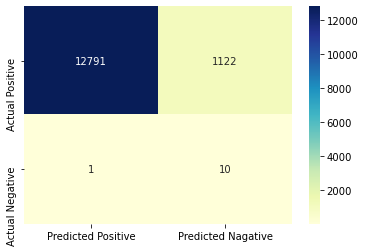

In [685]:
sns.heatmap(cm_log, annot=True, fmt='d', cmap='YlGnBu')

### Accuracy, precision, recall, f1 score per fold (10 folds)

In [649]:
df_rfacc_f = pd.DataFrame(rf_acc_f)
df_rfpr_f = pd.DataFrame(rf_precision_f)
df_rfrec_f = pd.DataFrame(rf_recall_f)
df_rff1_f = pd.DataFrame(rf_f1_f)
df_rf_f = pd.concat([df_rfacc_f, df_rfpr_f,df_rfrec_f,df_rff1_f], axis=1)
df_rf_f.set_axis(['accuracy', 'precision', 'recall', 'f1'], axis=1, inplace=False)

,accuracy,precision,recall,f1
0,0.888889,0.888889,0.888889,0.888889
1,0.833333,0.875000,0.777778,0.823529
2,0.777778,0.857143,0.666667,0.750000
3,0.722222,0.833333,0.555556,0.666667
4,0.888889,0.818182,1.000000,0.900000
5,0.777778,0.833333,0.555556,0.750000
6,0.777778,0.857143,0.666667,0.750000
7,1.000000,1.000000,1.000000,1.000000
8,0.722222,0.700000,0.777778,0.736842
9,0.944444,1.000000,0.888889,0.941176


### Score mean

In [650]:
print("Accuracy score :", np.mean(rf_acc_f))
print("Precision score :", np.mean(rf_precision_f))
print("Recall score :", np.mean(rf_recall_f))
print("F1 score :", np.mean(rf_f1_f))

Accuracy score : 0.8333333333333333
Precision score : 0.8663023088023089
Recall score : 0.7777777777777777
F1 score : 0.8207103543171655


### Classification report

In [651]:
print("Classification report logistic regression")
print(classification_report(y_test_resampled_filter, y_pred_rf_filter))

Classification report logistic regression
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     13913
           1       0.01      0.91      0.02        11

    accuracy                           0.92     13924
   macro avg       0.50      0.91      0.49     13924
weighted avg       1.00      0.92      0.96     13924



### Simulation dan apply ke minggu selanjutnya (week 3 dan 4)

### Filter data menjadi week 3 dan 4 saja

In [652]:
apply_filter = final_data.query("key_week in (3,4)")
apply_filter.head()

,cust_id_dummy,tot_amt_idr,merchant_id,fraud_status,hour,limit_per_day,error_type_cat,gap_reg_1st_trans,key_5days,key_10days,...,last_5days_trans,last_10days_trans,last_15days_trans,total_trans_each_day,sisa_limit,trans_month,trans_year,reg_day,reg_month,reg_year
0,1,200000,61057,0,21,4000000,2,72,25.0,30.0,...,300000,300000,300000,300000,92.50000,6,2022,14,4,2022
1,1,100000,61057,0,23,4000000,4,72,25.0,30.0,...,300000,300000,300000,300000,92.50000,6,2022,14,4,2022
2,2,63000,61008,0,0,4000000,2,59,25.0,30.0,...,63000,63000,63000,63000,98.42500,6,2022,26,4,2022
12,3,30000,61015,0,0,4000000,2,79,20.0,20.0,...,224250,487250,614250,30000,99.25000,6,2022,18,3,2022
13,3,194250,61011,0,16,4000000,0,79,20.0,20.0,...,224250,487250,614250,194250,95.14375,6,2022,18,3,2022


### Save model untuk di apply ke selanjutnya

In [654]:
filename = "logisticreg_model.pkl"
pickle.dump(rf_model_f, open(filename,"wb"))

### Mencari confusion matrix dan F1 score untuk week 3 dan 4 menggunakan for loop

In [655]:
loadedmodel = pickle.load(open(filename,"rb"))
r={}
for i in apply_filter['key_week'].unique():
    lmtest = apply_filter[apply_filter['key_week']==i].fraud_status
    lmpred = loadedmodel.predict(apply_filter[apply_filter['key_week']==i][X_train_resampled_filter.columns])
    print("Confusion Matrix", i)
    r[i]=pd.DataFrame(confusion_matrix(lmtest,lmpred), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])
    print(r[i])
    print('Accuracy:', accuracy_score(lmtest, lmpred))
    print('Precision:', precision_score(lmtest, lmpred))
    print('Recall:', recall_score(lmtest, lmpred))
    print('F1 score:', f1_score(lmtest, lmpred, average='weighted'))

Confusion Matrix 4.0
                 Predicted Positive  Predicted Nagative
Actual Positive               71098               10820
Actual Negative                  15                  77
Accuracy: 0.8678819656139495
Precision: 0.007066164999541158
Recall: 0.8369565217391305
F1 score: 0.928170686311307
Confusion Matrix 3.0
                 Predicted Positive  Predicted Nagative
Actual Positive               53526                4846
Actual Negative                   3                  49
Accuracy: 0.9170032863206902
Precision: 0.010010214504596528
Recall: 0.9423076923076923
F1 score: 0.9558332087894749


### Save result dan dijadikan ke dalam data frame

In [656]:
data={'Week': ['1-2', '3', '4'],'Accuracy': [0.8333333333333333, 0.9170032863206902, 0.8678819656139495], 'Precision': [0.8663023088023089, 0.010010214504596528, 0.007066164999541158], 'Recall': [0.7777777777777777, 0.9423076923076923, 0.8369565217391305], 'F1 Score': [0.8207103543171655, 0.9558332087894749, 0.928170686311307]}
simulation=pd.DataFrame(data)
simulation

,Week,Accuracy,Precision,Recall,F1 Score
0,1-2,0.833333,0.866302,0.777778,0.820710
1,3,0.917003,0.010010,0.942308,0.955833
2,4,0.867882,0.007066,0.836957,0.928171


### Feature importance

In [521]:
len(X_filter.columns)

23

In [546]:
# model = LogisticRegression(random_state=42).fit(X_filter, y_filter)
# feature_impt_filter = model.coef_
# for i in range(len(X_filter.columns)):
#         print('Feature: %s, Score: %.10f' % (X_filter.columns[i],feature_impt_filter[0][i]))

# model = RandomForestClassifier(n_estimators = 100).fit(X_filter, y_filter)
# feature_impt_filter = model.feature_importances_
# for i in range(len(X_filter.columns)):
#     feature_impt = pd.DataFrame({'feature': list(X_filter.columns), 'score': abs(feature_impt_filter[0])})
# feature_impt=feature_impt.sort_values('score', ascending=False)
# feature_impt

,feature,score
16,total_trans_each_day,4.697279e-05
13,last_5days_trans,3.726210e-05
15,last_15days_trans,7.120332e-06
0,cust_id_dummy,2.541240e-06
4,limit_per_day,1.889157e-06
14,last_10days_trans,1.725239e-06
1,tot_amt_idr,9.309691e-07
2,merchant_id,3.096606e-07
6,gap_reg_1st_trans,9.165659e-08
20,reg_day,5.686104e-08


In [657]:
feature_impt = np.zeros(X_filter.shape[1])
model = RandomForestClassifier(n_estimators = 100).fit(X_filter, y_filter)
feature_impt = model.feature_importances_
feature_impt = pd.DataFrame({'feature': list(X_filter.columns), 'importance': feature_impt}).sort_values('importance', ascending = False)
feature_impt

,feature,importance
0,cust_id_dummy,0.140470
6,gap_reg_1st_trans,0.096826
1,tot_amt_idr,0.082266
20,reg_day,0.075784
3,hour,0.075072
16,total_trans_each_day,0.063734
2,merchant_id,0.061402
14,last_10days_trans,0.060405
15,last_15days_trans,0.057988
17,sisa_limit,0.057917


<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Feature'>

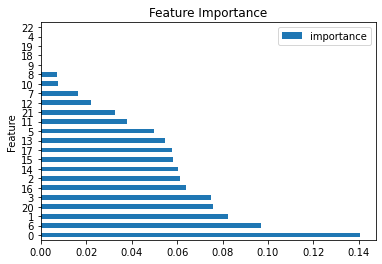

In [658]:
graph_filter = feature_impt.plot(kind='barh', title ='Feature Importance', xlabel ='Feature',ylabel='Importance')
graph_filter

### Select X_train dan y_train

In [659]:
X_train_filter_f = data_filter.loc[:, ~data_filter.columns.isin(['fraud_status','limit_per_day','trans_year','reg_year','key_15days','trans_month'])]
y_train_filter_f = data_filter['fraud_status']

### Select X_test dan y_test

In [660]:
X_test_filter_f = data_filter.loc[:, ~data_filter.columns.isin(['fraud_status','limit_per_day','trans_year','reg_year','key_15days','trans_month'])]
y_test_filter_f = data_filter['fraud_status']

### Logistic regression

In [662]:
kf=StratifiedKFold(n_splits=10)
for index_train, index_test in kf.split(X_filter,y_filter):
    under_sampler_filter = RandomUnderSampler(random_state=42, sampling_strategy='majority')
    X_train_resampled_f_, y_train_resampled_f_ = under_sampler_filter.fit_resample(X[X.index.isin(index_train)], y[y.index.isin(index_train)])
    X_test_resampled_f_, y_test_resampled_f_ = X[X.index.isin(index_test)], y[y.index.isin(index_test)]
    rf_model_f_ = RandomForestClassifier(n_estimators = 100).fit(X_train_resampled_f_, y_train_resampled_f_)
    y_pred_rf_f_ = rf_model_f.predict(X_test_resampled_f_)
    print("Confusion Matrix")
    cm_rf_ = pd.DataFrame(confusion_matrix(y_test_resampled_f_,y_pred_rf_f_), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])
    print(cm_rf_)
    rf_acc_f_ = cross_val_score(rf_model_f, X_train_resampled_f_, y_train_resampled_f_, cv=kf)
    rf_recall_f_ = cross_val_score(rf_model_f, X_train_resampled_f_, y_train_resampled_f_, cv=kf, scoring='recall')
    rf_precision_f_ = cross_val_score(rf_model_f, X_train_resampled_f_, y_train_resampled_f_, cv=kf, scoring='precision')
    rf_f1_f_ = cross_val_score(rf_model_f, X_train_resampled_f_, y_train_resampled_f_, cv=kf, scoring='f1')

Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               11556                2358
Actual Negative                   0                  11
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               11885                2031
Actual Negative                   0                   8
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               12369                1547
Actual Negative                   0                   8
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               12713                1198
Actual Negative                   0                  13
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Actual Positive               12706                1202
Actual Negative                   0                  16
Confusion Matrix
                 Predicted Positive  Predicted Nagative
Ac

### Accuracy, precision, recall, dan f1 score

In [663]:
df_logacc_f_ = pd.DataFrame(log_acc_f_)
df_logpr_f_ = pd.DataFrame(log_precision_f_)
df_logrec_f_ = pd.DataFrame(log_recall_f_)
df_logf1_f_ = pd.DataFrame(log_f1_f_)
df_log_f_ = pd.concat([df_logacc_f_, df_logpr_f_,df_logrec_f_,df_logf1_f_], axis=1)
df_log_f_.set_axis(['accuracy', 'precision', 'recall', 'f1'], axis=1, inplace=False)

,accuracy,precision,recall,f1
0,0.944444,0.900000,1.000000,0.947368
1,0.833333,0.875000,0.777778,0.823529
2,0.722222,0.833333,0.555556,0.666667
3,0.722222,0.833333,0.555556,0.666667
4,0.944444,1.000000,0.888889,0.941176
5,0.777778,0.857143,0.666667,0.750000
6,0.777778,0.857143,0.666667,0.750000
7,1.000000,1.000000,1.000000,1.000000
8,0.722222,0.700000,0.777778,0.736842
9,0.777778,1.000000,0.555556,0.714286


### Mean score

In [664]:
print("Accuracy score :", np.mean(log_acc_f_))
print("Precision score :", np.mean(log_precision_f_))
print("Recall score :", np.mean(log_recall_f_))
print("F1 score :", np.mean(log_f1_f_))

Accuracy score : 0.8222222222222223
Precision score : 0.8855952380952381
Recall score : 0.7444444444444444
F1 score : 0.7996535456287778


### Save model

In [665]:
filename = "logisticreg_model_f.pkl"
pickle.dump(log_model_f_, open(filename,"wb"))

### Confusion matrix dan score

In [666]:
loadedmodel = pickle.load(open(filename,"rb"))
r={}
for i in apply_filter['key_week'].unique():
    lmtest_f = apply_filter[apply_filter['key_week']==i].fraud_status
    lmpred_f = loadedmodel.predict(apply_filter[apply_filter['key_week']==i][X_train_resampled_f_.columns])
    print("Confusion Matrix", i)
    r[i]=pd.DataFrame(confusion_matrix(lmtest_f,lmpred_f), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])
    print(r[i])
    print('Accuracy:', accuracy_score(lmtest_f, lmpred_f))
    print('Precision:', precision_score(lmtest_f, lmpred_f))
    print('Recall:', recall_score(lmtest_f, lmpred_f))
    print('F1 score:', f1_score(lmtest_f, lmpred_f, average='weighted'))

Confusion Matrix 4.0
                 Predicted Positive  Predicted Nagative
Actual Positive               76101                5817
Actual Negative                  31                  61
Accuracy: 0.9286916229728082
Precision: 0.010377679482817285
Recall: 0.6630434782608695
F1 score: 0.9619416695689741
Confusion Matrix 3.0
                 Predicted Positive  Predicted Nagative
Actual Positive               54931                3441
Actual Negative                   6                  46
Accuracy: 0.9410002738600575
Precision: 0.01319185546314884
Recall: 0.8846153846153846
F1 score: 0.9687389312420278


### Save result setelah feature importances

In [667]:
data_f={'Week': ['1-2', '3', '4'],'Accuracy': [0.8222222222222223, 0.9410002738600575, 0.9286916229728082], 'Precision': [0.8855952380952381, 0.01319185546314884, 0.010377679482817285], 'Recall': [0.7444444444444444, 0.8846153846153846, 0.6630434782608695], 'F1 Score': [0.7996535456287778, 0.9687389312420278, 0.9619416695689741]}
simulation_f=pd.DataFrame(data_f)
simulation_f

,Week,Accuracy,Precision,Recall,F1 Score
0,1-2,0.822222,0.885595,0.744444,0.799654
1,3,0.941000,0.013192,0.884615,0.968739
2,4,0.928692,0.010378,0.663043,0.961942


### Visualize dengan line plot

[Text(0.5, 1.0, 'Accuracy')]

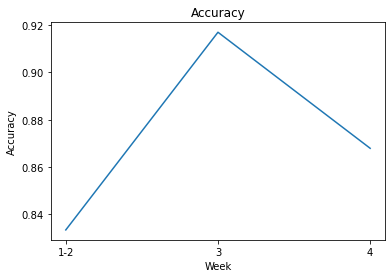

In [668]:
sns.lineplot(data=simulation, x="Week", y="Accuracy").set(title='Accuracy')

[Text(0.5, 1.0, 'Precision')]

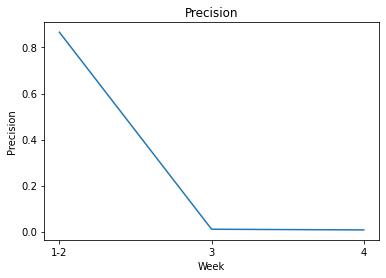

In [669]:
sns.lineplot(data=simulation, x="Week", y="Precision").set(title='Precision')

[Text(0.5, 1.0, 'Recall')]

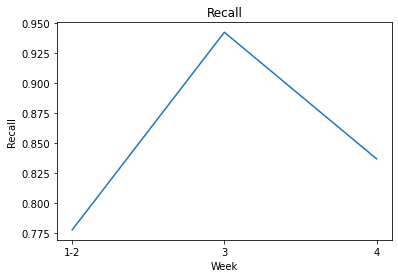

In [670]:
sns.lineplot(data=simulation, x="Week", y="Recall").set(title='Recall')

[Text(0.5, 1.0, 'F1 Score')]

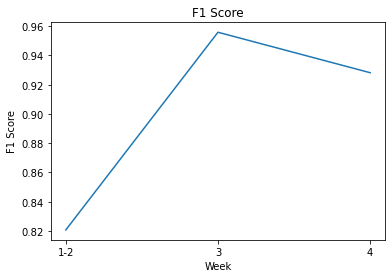

In [671]:
sns.lineplot(data=simulation, x="Week", y="F1 Score").set(title='F1 Score')